# PyTorch Workflow

 -  Data(prepare & load)
 -  Build Model
 -  Training
 -  Inference
 -  Saving & Loading
 -  Putting it all together

In [4]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

import numpy as np

# Check pytorch version

torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

* Excel spreadsheet
* Images
* Videos
* Audio
* Text

In [5]:
# Linear regression -> y = mx + b

# y is the number of ice creams sold.
# x is the temperature.
# m is a number that tells you how many more ice creams you sell when it gets hotter (or how many fewer when it gets colder).
# b is another number that tells you how many ice creams you sell when it's neither hot nor cold.

# Create known params

weight = 0.9
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3180],
         [0.3360],
         [0.3540],
         [0.3720],
         [0.3900],
         [0.4080],
         [0.4260],
         [0.4440],
         [0.4620]]))

### Splitting data into training and test sets

In [6]:
# Creating a training split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize data

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  "Plots training data, test data and compares predictions"

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # Are there predictions?
  if predictions is not None:
    # Plot predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

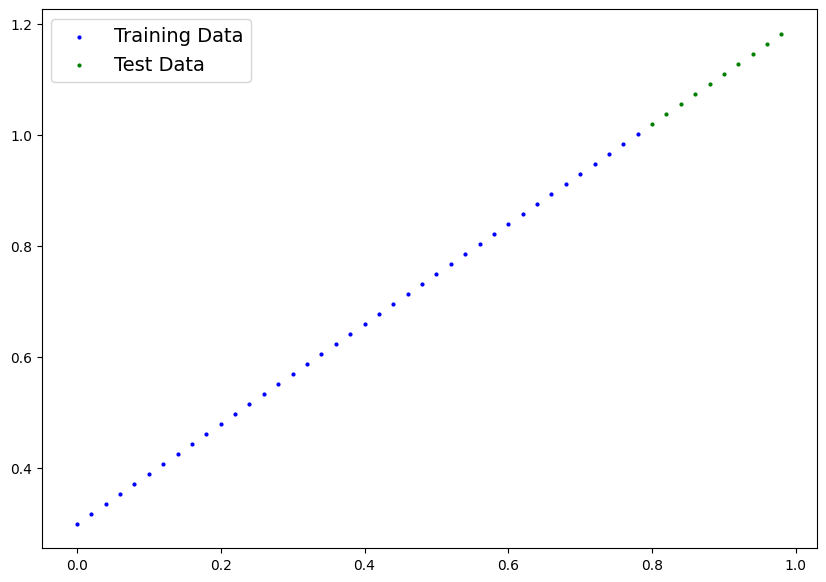

In [8]:
plot_predictions()

## Creating Model

In [9]:
 # Creating linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float64))

    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float64))

  # Forward Method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [10]:
# Random seed

torch.manual_seed(42)

# Create instance of model

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.0582], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.0629], dtype=torch.float64, requires_grad=True)]

In [11]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.1094],
        [0.1106],
        [0.1118],
        [0.1129],
        [0.1141],
        [0.1152],
        [0.1164],
        [0.1176],
        [0.1187],
        [0.1199]], dtype=torch.float64)

In [12]:
y_test

tensor([[1.0200],
        [1.0380],
        [1.0560],
        [1.0740],
        [1.0920],
        [1.1100],
        [1.1280],
        [1.1460],
        [1.1640],
        [1.1820]])

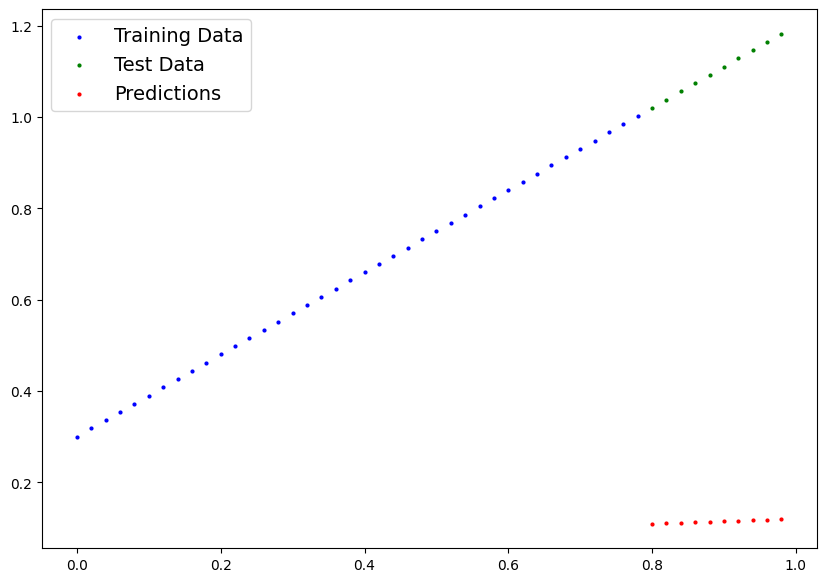

In [13]:
plot_predictions(predictions=y_preds)

## Test Model

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.0582], dtype=torch.float64)),
             ('bias', tensor([0.0629], dtype=torch.float64))])

In [15]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [41]:
# Training loop

epoch_count = []
losses = []
test_losses = []

torch.manual_seed(42)

# No. Loops
epochs = 200

# Loop
for epoch in range(epochs):
  # Training mode
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer
  optimizer.zero_grad()

  # Propagation
  loss.backward()

  # Optimizer
  optimizer.step()

  # Testing

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    losses.append(loss.detach())
    test_losses.append(test_loss.detach())

    print(f"Epoch: {epoch}")
    print(f"Loss: {loss}")
    print(f"Test Loss: {test_loss}")

Epoch: 0
Loss: 0.004329100676352973
Test Loss: 0.009190037340726076
Epoch: 10
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 20
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 30
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 40
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 50
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 60
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 70
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 80
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 90
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 100
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 110
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 120
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 130
Loss: 0.004832093860419705
Test Loss: 0.0038411624919064023
Epoch: 140
Loss: 0

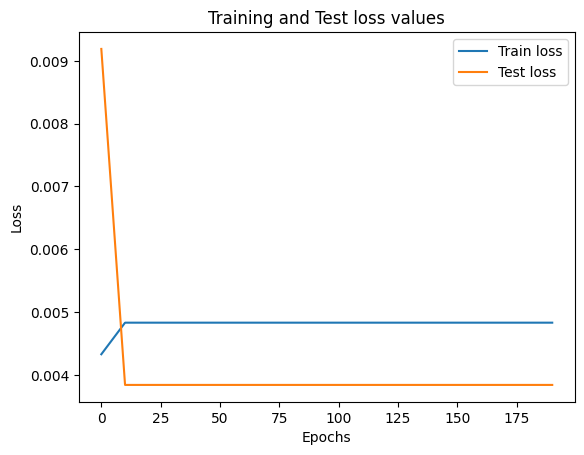

In [42]:
# Loss Plot

plt.plot(epoch_count, losses, label="Train loss")
plt.plot(epoch_count, test_losses, label="Test loss")
plt.title("Training and Test loss values")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [43]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

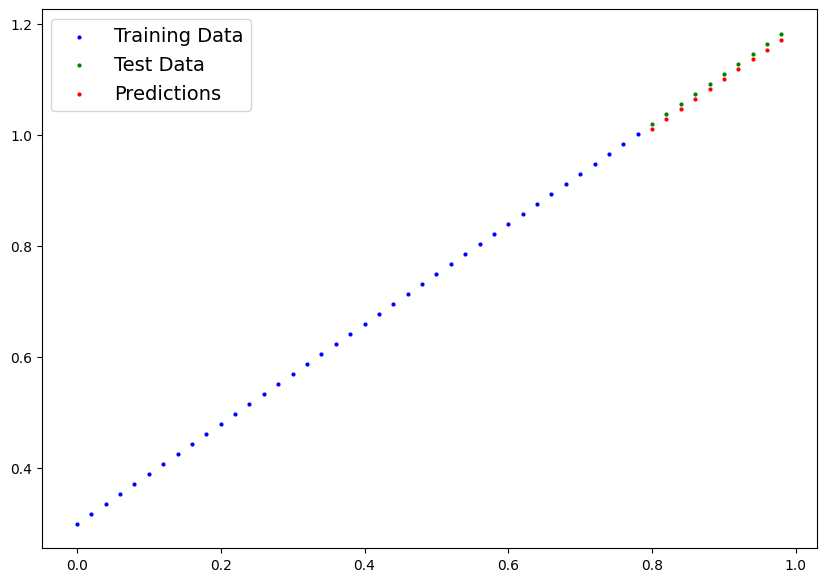

In [44]:
plot_predictions(predictions=y_preds_new)

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5367], dtype=torch.float64)),
             ('bias', tensor([0.4524], dtype=torch.float64))])

## Saving a model

In [45]:
# Saving our model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_linear_regression_model.pth


In [46]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1203 Oct  7 13:50 01_linear_regression_model.pth


## Loading a pytorch model

In [47]:
# 1. Create instance
loaded_model_0 = LinearRegressionModel()

# 2. Load the model for dir
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [48]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.8904], dtype=torch.float64)),
             ('bias', tensor([0.2989], dtype=torch.float64))])

In [49]:
# Make predictions on loaded model
loaded_model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)
  loaded_model_preds = loaded_model_0(X_test)

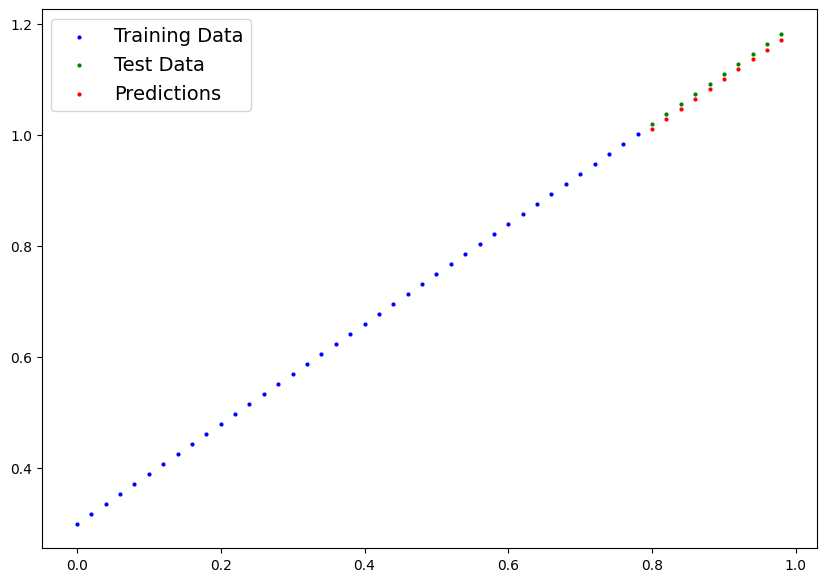

In [50]:
plot_predictions(predictions=loaded_model_preds)

In [52]:
# Compare preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together

PyTorch version: 2.0.1+cu118
Using device: cuda
Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.437514990568161
Epoch: 10 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 20 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 30 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 40 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 50 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 60 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 70 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 80 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 90 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 100 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 110 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 120 | Loss: 0.04952087625861168 | Test Loss: 0.15278580784797668
Epoch: 130 | Loss: 0.049520876

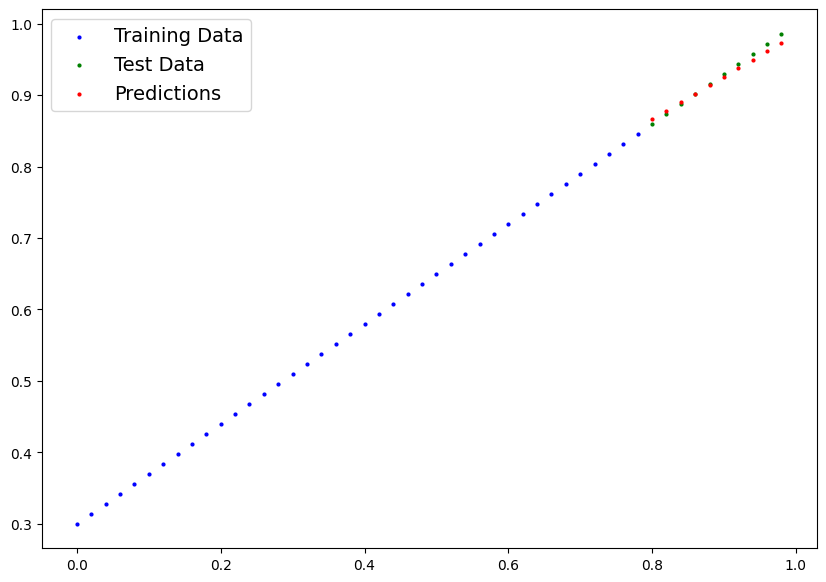

In [32]:
# Imports
import torch
from torch import nn
import matplotlib.pyplot as plt



# Check versions
print(f"PyTorch version: {torch.__version__}")

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Create some data

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

# Create X and y

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Split data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  "Plots training data, test data and compares predictions"

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # Are there predictions?
  if predictions is not None:
    # Plot predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

# Building a linear model
class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()

    # Use nn.Linear
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(X)

# Set the manual seed
torch.manual_seed(42)

model_1 = LinearRegressionV2()
model_1.state_dict()

# Set data to use target device
model_1.to(device)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

# Training

## Loss, Optim
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1113)

## Loop
torch.manual_seed(42)

epochs = 200

test_pred = torch.rand(10, 1)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step
  optimizer.step()

  # 6. Testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # 7. Info
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


# Plot data

plot_predictions(train_data=X_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=X_test.cpu(),
                     test_labels=y_test.cpu(),
                      predictions=test_pred.cpu())


# Saving our model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "02_linear_regression_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)